In [37]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [38]:
image = Image.open('datasets/dogs.jpeg')
 
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

JPEG
(272, 185)
RGB


In [39]:
n_colors = 256

dogs = np.array(image, dtype=np.float64) / 255
dogs

array([[[0.94117647, 0.94117647, 0.94117647],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.94117647, 0.94117647, 0.94117647],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.94117647, 0.94117647, 0.94117647],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.98823529, 0.97254902, 0.97647059],
        [0.99607843, 0.98039216, 0.98431373],
        [1.        , 0

In [40]:
w, h, d = original_shape = tuple(dogs.shape)
assert d == 3
image_array = np.reshape(dogs, (w * h, d))
image_array

array([[0.94117647, 0.94117647, 0.94117647],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       ...,
       [0.99607843, 0.99607843, 0.99607843],
       [0.99607843, 0.99607843, 0.99607843],
       [0.99607843, 0.99607843, 0.99607843]])

In [41]:
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

In [42]:
labels = kmeans.predict(image_array)

In [43]:
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
codebook_random

array([[0.7372549 , 0.56862745, 0.43137255],
       [0.00784314, 0.00784314, 0.00784314],
       [0.78823529, 0.77254902, 0.76862745],
       [0.92941176, 0.83137255, 0.70980392],
       [1.        , 0.99607843, 0.98431373],
       [0.        , 0.        , 0.        ],
       [0.30196078, 0.2627451 , 0.25882353],
       [0.99607843, 0.99607843, 0.99607843],
       [0.99607843, 0.99607843, 0.99607843],
       [1.        , 1.        , 1.        ],
       [0.97254902, 0.85490196, 0.70588235],
       [0.35686275, 0.24313725, 0.18039216],
       [1.        , 1.        , 1.        ],
       [0.00392157, 0.00392157, 0.00392157],
       [0.03921569, 0.01568627, 0.01568627],
       [1.        , 0.99607843, 1.        ],
       [0.84313725, 0.70980392, 0.6       ],
       [0.41176471, 0.41176471, 0.40392157],
       [0.0745098 , 0.05098039, 0.05098039],
       [0.96470588, 0.88235294, 0.77647059],
       [0.00392157, 0.00392157, 0.00392157],
       [0.99607843, 0.99607843, 0.99607843],
       [0.

In [44]:
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
labels_random

array([146,   9,   9, ...,   7,   7,   7], dtype=int64)

In [45]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000000000000002].


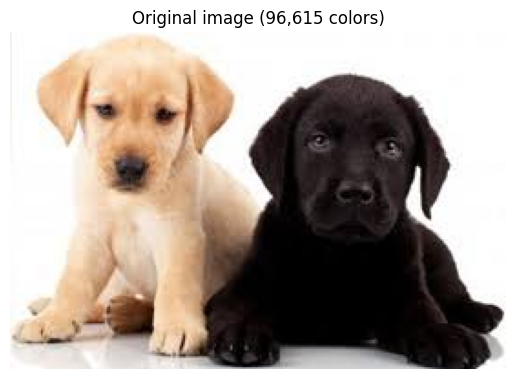

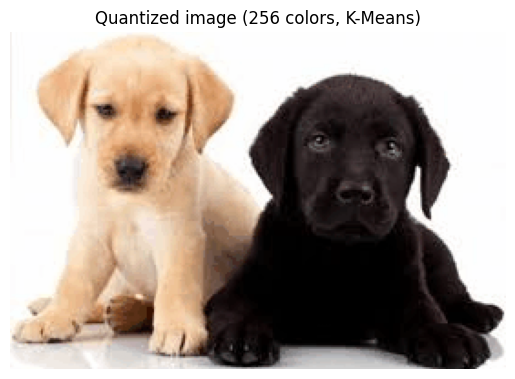

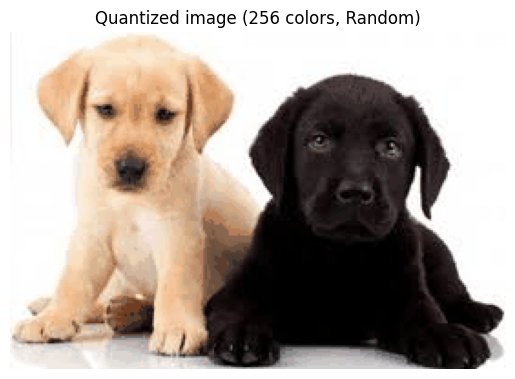

In [46]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(dogs)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()